In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dslab import adguide #source: https://github.com/adophobr/PhotonicIntegratedCircuits/blob/main/jupyter/utils/dslab.py
import warnings
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [2]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi
emeApi = lumapi.MODE()

Units

In [3]:
um = 1e-6
nm = 1e-9

Materials

In [4]:
materialClad = "SiO2 (Glass) - Palik"
materialSi = "Si (Silicon) - Dispersive & Lossless"

# Add material
matname = materialSi
'''matReturn = emeApi.getmaterial(materialSi)
if (emeApi.findstring(matReturn, 'cannot be found') != -1):
    emeApi.addmaterial("Lorentz")
    emeApi.setmaterial('New material 1', "Name", matname)
    emeApi.setmaterial(matname, "Name", matname)
    emeApi.setmaterial(matname, "Permittivity", 7.9837492)
    emeApi.setmaterial(matname, "Lorentz Linewidth", 1e8)
    emeApi.setmaterial(matname, "Lorentz Resonance", 3.93282466e+15)
    emeApi.setmaterial(matname, "Lorentz Permittivity", 3.68799143)
    emeApi.setmaterial(matname, "color", np.array([0.85, 0, 0, 1])) # red'''

emeApi.addmaterial("Lorentz")
emeApi.setmaterial('New material 1', "Name", matname)
emeApi.setmaterial(matname, "Permittivity", 7.9837492)
emeApi.setmaterial(matname, "Lorentz Linewidth", 1e8)
emeApi.setmaterial(matname, "Lorentz Resonance", 3.93282466e+15)
emeApi.setmaterial(matname, "Lorentz Permittivity", 3.68799143)
emeApi.setmaterial(matname, "color", np.array([0.85, 0, 0, 1])) # red
#materialSi = 'materialSi'


In [5]:
'''
matname = materialClad
matReturn = emeApi.getmaterial(materialClad)
if (emeApi.findstring(matReturn, 'cannot be found') != -1):
    newmaterial = emeApi.addmaterial("Lorentz")
    emeApi.setmaterial(matname, "name", matname)
    emeApi.setmaterial(matname, "Permittivity", 2.119881)
    emeApi.setmaterial(matname, "Lorentz Linewidth", 1e10)
    emeApi.setmaterial(matname, "Lorentz Resonance", 3.309238e+13)
    emeApi.setmaterial(matname, "Lorentz Permittivity", 49.43721)
    emeApi.setmaterial(matname, "color", np.array([0.5, 0.5, 0.5, 1])) # grey
'''

'\nmatname = materialClad\nmatReturn = emeApi.getmaterial(materialClad)\nif (emeApi.findstring(matReturn, \'cannot be found\') != -1):\n    newmaterial = emeApi.addmaterial("Lorentz")\n    emeApi.setmaterial(matname, "name", matname)\n    emeApi.setmaterial(matname, "Permittivity", 2.119881)\n    emeApi.setmaterial(matname, "Lorentz Linewidth", 1e10)\n    emeApi.setmaterial(matname, "Lorentz Resonance", 3.309238e+13)\n    emeApi.setmaterial(matname, "Lorentz Permittivity", 49.43721)\n    emeApi.setmaterial(matname, "color", np.array([0.5, 0.5, 0.5, 1])) # grey\n'

Dimensions

In [6]:
nr = 3.476 # wl @1550nm
nc = 1.444 # wl @1550nm
lambda0 = 1550*nm
Wm = 7*um
k0 = 2*np.pi/lambda0
sigmaTE = 0 #ref: soldano
sigmaTM = 1 #ref: soldano
We= Wm + (lambda0/np.pi) * ((nc/nr)**(2*sigmaTE)) * ((nr**2 - nc**2)**(-0.5))
Lpi = (4*nr*We**2)/(3*lambda0) #soldano

In [7]:
betaTE, neffTE,kfTE, alsTE, alcTE, MTE = adguide(nr,nc,nc,lambda0,Wm/2,'TE')

In [39]:
Lpi_num = 2*np.pi/(betaTE[0]-betaTE[2]) #soldano eq. 6
print(Lpi_num/um)

114.57070035855693


L is defined as

$L =  \frac{3\cdot L_{\pi}} {N} $ (Soldano table 1)

Parameters

In [41]:
#box
Wm = 7*um
N = 2
p = 1
L = (3/N)*(Lpi_num/4)
#tapers
taper_large_tip = 1.5*um
taper_length = 15*um
#slabs 
width = 450*nm
height = 220*nm
length = 1.5*um
cband = True
print(int(L/um))

42


In [10]:
# C band simulation: 1520 ~ 1575 nm
# L band simulation: 1555 ~ 1635 nm
if cband:
    wl_start = 1520*nm
    wl_stop = 1575*nm
else:
    wl_start = 1555*nm
    wl_stop = 1635*nm

In [11]:
emeApi.switchtolayout()
emeApi.deleteall()
emeApi.cleardcard

<bound method Lumerical.__init__.<locals>.<lambda>.<locals>.<lambda> of <lumapi.MODE object at 0x00000246B30EB710>>

In [12]:
emeApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
emeApi.set('name', dev_layer)

Box

In [13]:
emeApi.addrect()
emeApi.addtogroup(dev_layer)
emeApi.set('name','box')
emeApi.set('x',0)
emeApi.set('x span', L)
emeApi.set('y',0)
emeApi.set('y span', Wm)
emeApi.set('z',height/2)
emeApi.set('z span', height)
emeApi.set('material', materialSi)

Tapers

In [14]:
for i in range(4):
    emeApi.addobject('linear_taper')
    emeApi.set('name', f'taper port {str(i+1)}')
    emeApi.set('thickness', height)
    emeApi.set('angle_side', 90)
    emeApi.set('width_l', width)
    emeApi.set('width_r', taper_large_tip)
    emeApi.set('len', taper_length)
    emeApi.set('material', materialSi)
    emeApi.set('x', -(emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2))
    emeApi.set('y', Wm/4)
    emeApi.set('z', height/2)

In [15]:
#adjusting port 2
emeApi.select(f'{dev_layer}::taper port 2')
emeApi.set('width_l', taper_large_tip)
emeApi.set('width_r', width)
emeApi.set('x', emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2)
emeApi.set('y', Wm/4)

##adjusting port 3
emeApi.select(f'{dev_layer}::taper port 3')
emeApi.set('width_l', taper_large_tip)
emeApi.set('width_r', width)
emeApi.set('x', emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2)
emeApi.set('y', -Wm/4)
#adjusting port 4

emeApi.select(f'{dev_layer}::taper port 4')
emeApi.set('y', -Wm/4)

Waveguides

In [16]:
for i in range(4):
    emeApi.addrect()
    emeApi.addtogroup(dev_layer)
    emeApi.set('name', f'port {str(i+1)}')
    emeApi.set('x', -(emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))
    emeApi.set('x span', length)
    emeApi.set('y', Wm/4)
    emeApi.set('y span', width)
    emeApi.set('z', height/2)
    emeApi.set('z span', height)
    emeApi.set('material', materialSi)

In [17]:
#adjusting
emeApi.select(f'{dev_layer}::port 2')
emeApi.set('x', (emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))

emeApi.select(f'{dev_layer}::port 3')
emeApi.set('x', (emeApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))
emeApi.set('y', -Wm/4)

emeApi.select(f'{dev_layer}::port 4')
emeApi.set('y',-Wm/4)

Adding solver

In [18]:
emeApi.addeme()

bound_x_offset = 0.5*um
bound_y_offset = 2*um
bound_z_offset = 0.5*um

port_y_span = 2*um
port_z_span = 2*um
#dimensions:

emeApi.set('x',0)
emeApi.set('x min', bound_x_offset + emeApi.getnamed(f'{dev_layer}::port 1', 'x min'))
emeApi.set('y', 0)
emeApi.set('y span', Wm + 2*bound_y_offset)
emeApi.set('z', height/2)
emeApi.set('z span', port_z_span+bound_z_offset)

#background material
emeApi.set('background material', materialClad)

In [19]:
print(L/um)

171.8560505378354


In [20]:
cell_wgd = 1
cell_taper = 16 
cell_box = 1

span_wgd = length - bound_x_offset
span_taper = taper_length
span_box = L

method_wgd   = 0
method_taper = 1
method_box   = 1

modes_wgd   = 4
modes_taper = 10
modes_box   = 32

#cell properties
emeApi.set('number of cell groups', 5) #waveguides -> tapers -> box -> tapers -> waveguides
emeApi.set('group spans', np.block([[span_wgd], [span_taper], [span_box], [span_taper], [span_wgd]]))
emeApi.set('cells', np.block([[cell_wgd], [cell_taper], [cell_box], [cell_taper], [cell_wgd]]))
emeApi.set('subcell method', np.block([[method_wgd], [method_taper], [method_box], [method_taper], [method_wgd]]))
emeApi.set('allow custom eigensolver settings', True)
emeApi.set('modes', np.block([[modes_wgd], [modes_taper], [modes_box], [modes_taper], [modes_wgd]]))
emeApi.set('display cells', 1)

#mesh cells setup
emeApi.set('mesh cells y', 200)
emeApi.set('mesh cells z', 200)

#boundary conditions
emeApi.set('y min bc', 'PML')
emeApi.set('y max bc', 'PML')
emeApi.set('z min bc', 'Symmetric')
emeApi.set('z max bc', 'PML')

In [21]:
emeApi.select('EME::Ports::port_1')
emeApi.set('use full simulation span',0)
emeApi.set('y', Wm/4)
emeApi.set('y span', port_y_span)
emeApi.set('z', 0)
emeApi.set('z span', port_z_span)
emeApi.set('mode selection', 'fundamental TE mode')

emeApi.select('EME::Ports::port_2')
emeApi.set('use full simulation span',0)
emeApi.set('y', Wm/4)
emeApi.set('y span', port_y_span)
emeApi.set('z', 0)
emeApi.set('z span', port_z_span)
emeApi.set('mode selection', 'fundamental TE mode')

emeApi.addemeport()
emeApi.set('use full simulation span',0)
emeApi.set('port location', 'right')
emeApi.set('y', -Wm/4)
emeApi.set('y span', port_y_span)
emeApi.set('z', 0)
emeApi.set('z span', port_z_span)
emeApi.set('mode selection', 'fundamental TE mode')

emeApi.addemeport()
emeApi.set('use full simulation span',0)
emeApi.set('port location', 'left')
emeApi.set('y', -Wm/4)
emeApi.set('y span', port_y_span)
emeApi.set('z', 0)
emeApi.set('z span', port_z_span)
emeApi.set('mode selection', 'fundamental TE mode')

Monitors    

In [22]:
emeApi.addemeprofile()
emeApi.set('name', 'profile')
emeApi.set('monitor type', 3)
emeApi.set('x',0)
emeApi.set('x span', emeApi.getnamed('EME', 'x span'))
emeApi.set('y',0)
emeApi.set('y span', Wm+2*bound_y_offset)
emeApi.set('z', height/2)

In [23]:
emeApi.save('MMIeme')
emeApi.run()

In [24]:
emeApi.emepropagate()   

LumApiError: 'emepropagate cannot be used while in layout mode.'

Sweep

In [173]:
nmbFrqPnts = 30
emeApi.setemeanalysis('propagation sweep', 1)
emeApi.setemeanalysis('parameter', 'group span 3')
emeApi.setemeanalysis('start', 0.9*span_box)
emeApi.setemeanalysis('stop', 1.1*span_box)
emeApi.setemeanalysis('number of points', nmbFrqPnts)

In [174]:
emeApi.emesweep('propagation sweep')

In [175]:
S = emeApi.getemesweep('S')
group_span = S['group_span_3']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)


NameError: name 'group_span' is not defined

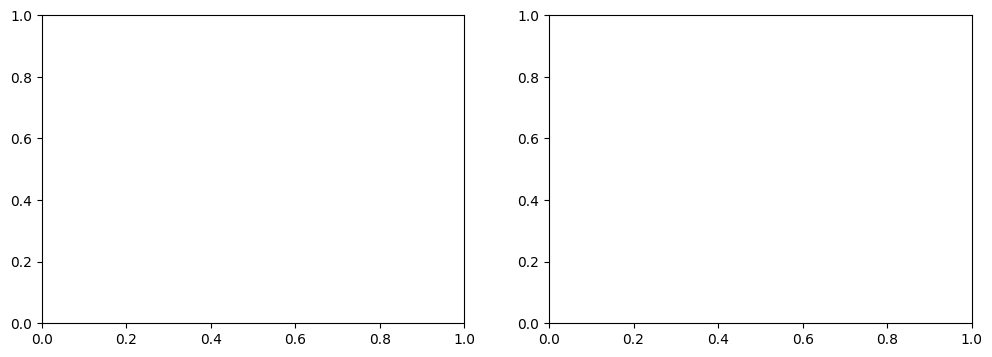

In [46]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].plot(group_span/um, T1, 'black', lw=1.5, label='S11')
axs[0].plot(group_span/um, T2, 'g', lw=1.5, label='S21')
axs[0].plot(group_span/um, T3, 'r--', lw=1.5, label='S31')
axs[0].set_xlabel('lambda (um)', fontsize = 12)
axs[0].set_ylabel('Transmitância', fontsize = 12)
axs[0].set_xlim([span_box*0.9/um,span_box*1.1/um])
#axs[0].set_ylim([0,0.55])
axs[0].legend()
axs[0].grid(True)

axs[1].plot(group_span/um, T1_dB, 'b', lw=1.5, label='S11')
axs[1].plot(group_span/um, T2_dB, 'g', lw=1.5, label='S21')
axs[1].plot(group_span/um, T3_dB, 'r--', lw=1.5, label='S31')
axs[1].set_xlabel('lambda (um)', fontsize = 12)
axs[1].set_ylabel('Transmitância (dB)', fontsize = 12)
axs[1].set_xlim([span_box*0.9/um,span_box*1.1/um])
axs[1].set_ylim([-10,0])
axs[1].legend()
axs[1].grid(True)

In [170]:
#field profile
E = emeApi.getresult('profile', 'field profile')

x = E['x']
x = x[:,0]/um
y = E['y']
y = y[:,0]/um
z = E['z']  

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

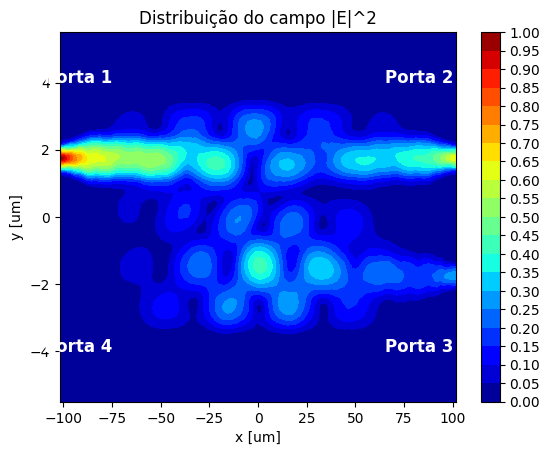

In [193]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 21, endpoint=True)

plt.contourf(x,y,np.transpose(Emag[:,:,0]), v, cmap=mycmap)
plt.colorbar(ticks=v)
plt.title('Distribuição do campo |E|^2', fontsize = 12)
plt.ylabel('y [um]', fontsize = 10)
plt.xlabel('x [um]', fontsize = 10)

plt.text(-110,4, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(65,4,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(65,-4,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-110,-4, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('Distribuição do campo E')

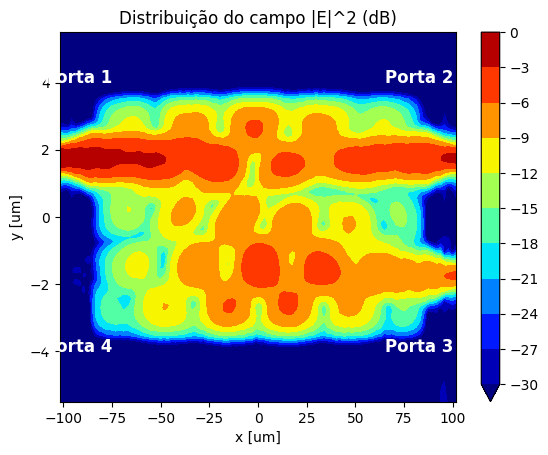

In [172]:
plt.figure()
#mycmap = plt.get_cmap('jet')

v = np.linspace(-30, 0, 11, endpoint=True)

CS = plt.contourf(x,y,10*np.log10(np.transpose(Emag[:,:,0])), v, cmap=mycmap, extend='min')
plt.colorbar(ticks=v)

plt.title('Distribuição do campo |E|^2 (dB)', fontsize = 12)
plt.ylabel('y [um]', fontsize = 10)
plt.xlabel('x [um]', fontsize = 10)

plt.text(-110,4, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(65,4,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(65,-4,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-110,-4, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('Distribuição do campo E (dB)')

Sweep of non optimized

In [177]:
emeApi.setemeanalysis('wavelength sweep', 1)
emeApi.setemeanalysis('start wavelength', wl_start)
emeApi.setemeanalysis('stop wavelength', wl_stop)
emeApi.setemeanalysis('number of wavelength points', nmbFrqPnts)
emeApi.setemeanalysis('calculate group delays', 1)

In [178]:
emeApi.emesweep('wavelength sweep')
S = emeApi.getemesweep('S_wavelength_sweep')
Lambda = S['wavelength']
#group_span = S['group_span_3']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)

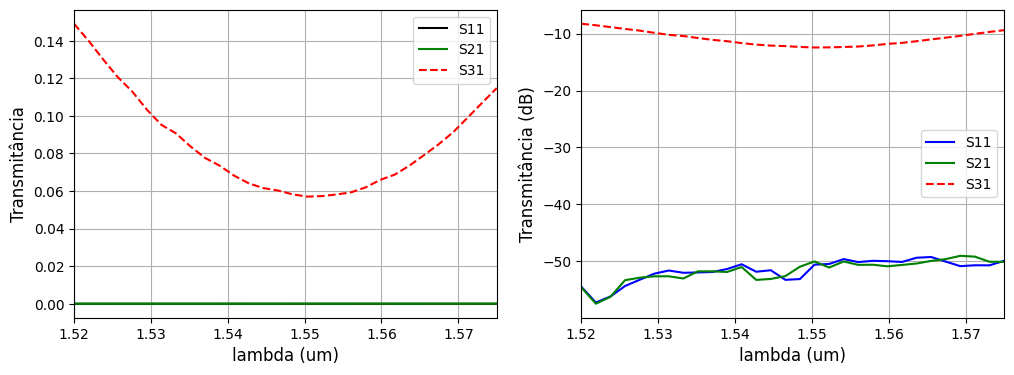

In [179]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].plot(Lambda/um, T1, 'black', lw=1.5, label='S11')
axs[0].plot(Lambda/um, T2, 'g', lw=1.5, label='S21')
axs[0].plot(Lambda/um, T3, 'r--', lw=1.5, label='S31')
axs[0].set_xlabel('lambda (um)', fontsize = 12)
axs[0].set_ylabel('Transmitância', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
#axs[0].set_ylim([0,0.55])
axs[0].legend()
axs[0].grid(True)

axs[1].plot(Lambda/um, T1_dB, 'b', lw=1.5, label='S11')
axs[1].plot(Lambda/um, T2_dB, 'g', lw=1.5, label='S21')
axs[1].plot(Lambda/um, T3_dB, 'r--', lw=1.5, label='S31')
axs[1].set_xlabel('lambda (um)', fontsize = 12)
axs[1].set_ylabel('Transmitância (dB)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
#axs[1].set_ylim([-20,0])
axs[1].legend()
axs[1].grid(True)

Imbalance, Insetion loss and phase shift (non optimized box length)

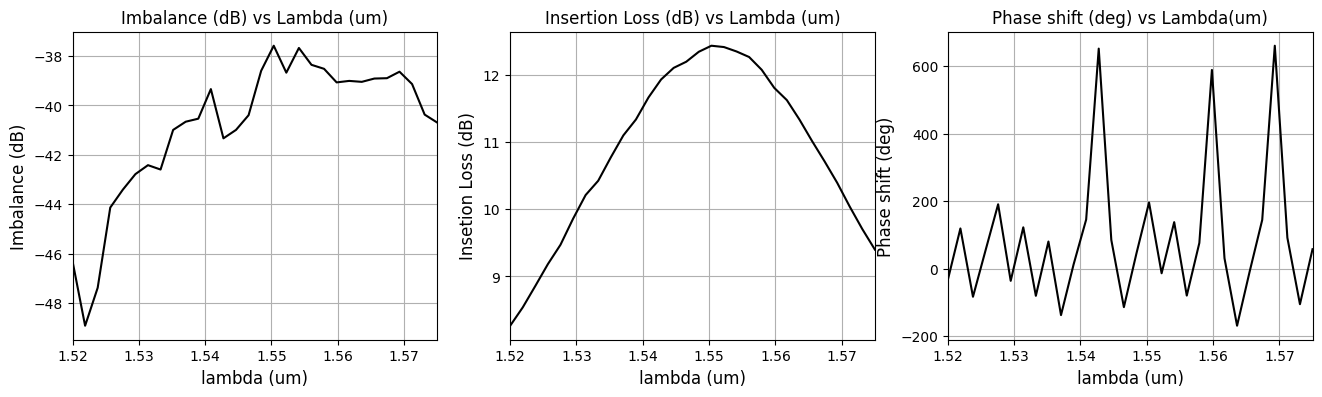

In [180]:
fig, axs = plt.subplots(1,3, figsize = (16,4))

#imbalance
Ib = T2_dB - T3_dB
axs[0].plot(Lambda/um, Ib, 'black', lw=1.5)
axs[0].set_xlabel('lambda (um)', fontsize = 12)
axs[0].set_ylabel('Imbalance (dB)', fontsize = 12)
axs[0].set_title('Imbalance (dB) vs Lambda (um)', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
axs[0].grid()


#Insetion Loss
Il = -10*np.log10(T2 + T3)
axs[1].plot(Lambda/um, Il, 'black', lw=1.5)
axs[1].set_xlabel('lambda (um)', fontsize = 12)
axs[1].set_ylabel('Insetion Loss (dB)', fontsize = 12)
axs[1].set_title('Insertion Loss (dB) vs Lambda (um)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
axs[1].grid()

#phase shift
phi1 = np.angle(S['s21'])
phi2 = np.angle(S['s31'])

phase = (phi1 - phi2)*(180/np.pi)

for p in range(len(phase)):
    if(abs(phase[p]) > 200):
        phase[p] = phase[p] + 360
        
axs[2].plot(Lambda/um, phase, 'black', lw=1.5)
axs[2].set_xlabel('lambda (um)', fontsize = 12)
axs[2].set_ylabel('Phase shift (deg)', fontsize = 12)
axs[2].set_title('Phase shift (deg) vs Lambda(um)', fontsize = 12)
axs[2].set_xlim([wl_start/um,wl_stop/um])
axs[2].grid()

Wavelength Sweep    

In [181]:
emeApi.setemeanalysis('group spans', np.block([[span_wgd], [span_taper], [47.3*um], [span_taper], [span_wgd]]))

In [182]:
emeApi.setemeanalysis('wavelength sweep', 1)
emeApi.setemeanalysis('start wavelength', wl_start)
emeApi.setemeanalysis('stop wavelength', wl_stop)
emeApi.setemeanalysis('number of wavelength points', nmbFrqPnts)
emeApi.setemeanalysis('calculate group delays', 1)

In [183]:
emeApi.emesweep('wavelength sweep')
S = emeApi.getemesweep('S_wavelength_sweep')
Lambda = S['wavelength']
#group_span = S['group_span_3']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)

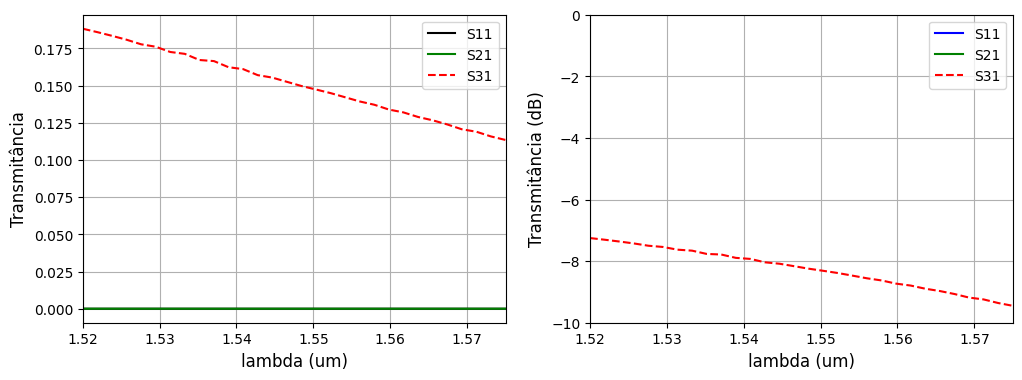

In [184]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].plot(Lambda/um, T1, 'black', lw=1.5, label='S11')
axs[0].plot(Lambda/um, T2, 'g', lw=1.5, label='S21')
axs[0].plot(Lambda/um, T3, 'r--', lw=1.5, label='S31')
axs[0].set_xlabel('lambda (um)', fontsize = 12)
axs[0].set_ylabel('Transmitância', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
#axs[0].set_ylim([0,0.55])
axs[0].legend()
axs[0].grid(True)

axs[1].plot(Lambda/um, T1_dB, 'b', lw=1.5, label='S11')
axs[1].plot(Lambda/um, T2_dB, 'g', lw=1.5, label='S21')
axs[1].plot(Lambda/um, T3_dB, 'r--', lw=1.5, label='S31')
axs[1].set_xlabel('lambda (um)', fontsize = 12)
axs[1].set_ylabel('Transmitância (dB)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
axs[1].set_ylim([-10,0])
axs[1].legend()
axs[1].grid(True)

Imbalance, Insetion loss and phase shift

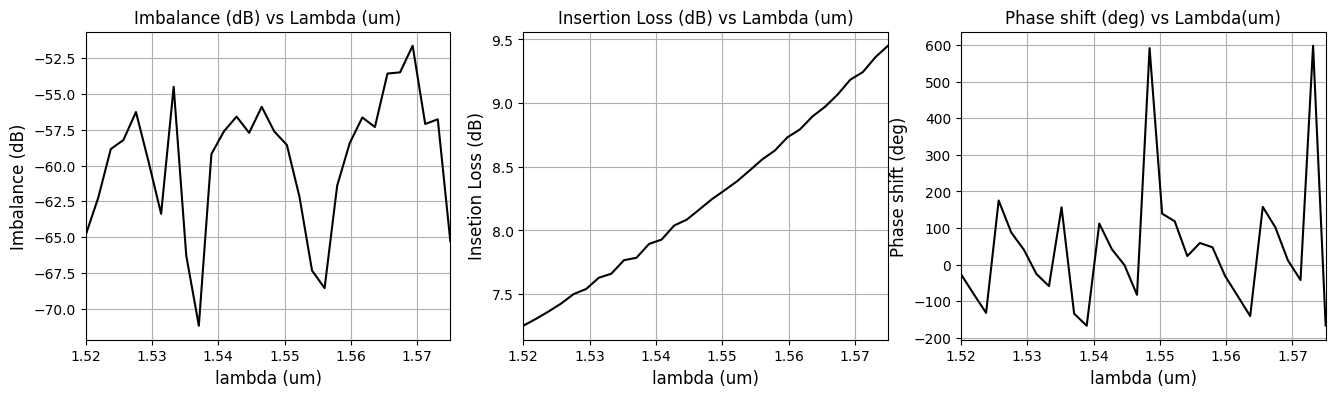

In [185]:
fig, axs = plt.subplots(1,3, figsize = (16,4))

#imbalance
Ib = T2_dB - T3_dB
axs[0].plot(Lambda/um, Ib, 'black', lw=1.5)
axs[0].set_xlabel('lambda (um)', fontsize = 12)
axs[0].set_ylabel('Imbalance (dB)', fontsize = 12)
axs[0].set_title('Imbalance (dB) vs Lambda (um)', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
axs[0].grid()


#Insetion Loss
Il = -10*np.log10(T2 + T3)
axs[1].plot(Lambda/um, Il, 'black', lw=1.5)
axs[1].set_xlabel('lambda (um)', fontsize = 12)
axs[1].set_ylabel('Insetion Loss (dB)', fontsize = 12)
axs[1].set_title('Insertion Loss (dB) vs Lambda (um)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
axs[1].grid()

#phase shift
phi1 = np.angle(S['s21'])
phi2 = np.angle(S['s31'])

phase = (phi1 - phi2)*(180/np.pi)

for p in range(len(phase)):
    if(abs(phase[p]) > 200):
        phase[p] = phase[p] + 360
        
axs[2].plot(Lambda/um, phase, 'black', lw=1.5)
axs[2].set_xlabel('lambda (um)', fontsize = 12)
axs[2].set_ylabel('Phase shift (deg)', fontsize = 12)
axs[2].set_title('Phase shift (deg) vs Lambda(um)', fontsize = 12)
axs[2].set_xlim([wl_start/um,wl_stop/um])
axs[2].grid()

In [186]:
emeApi.exportemesweep('EME_mmi_2x2_TE.dat') 

In [187]:
emeApi.switchtolayout()

In [188]:
#boundary conditions
emeApi.set('y min bc', 'PML')
emeApi.set('y max bc', 'PML')
emeApi.set('z min bc', 'Anti-Symmetric') #TM Mode
emeApi.set('z max bc', 'PML')

In [189]:
emeApi.run()
emeApi.emepropagate()

In [190]:
emeApi.setemeanalysis('wavelength sweep', 1)
emeApi.setemeanalysis('start wavelength', wl_start)
emeApi.setemeanalysis('stop wavelength', wl_stop)
emeApi.setemeanalysis('number of wavelength points', nmbFrqPnts)
emeApi.setemeanalysis('calculate group delays', 1)

In [191]:
emeApi.exportemesweep('EME_mmi_2x2_TM.dat') 

LumApiError: 'Unable to export wavelength sweep'